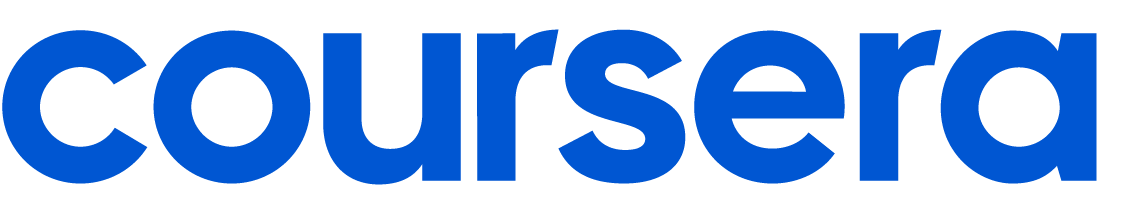

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

!pip install xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 55

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.exceptions import NotFittedError

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from IPython.display import display


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [6]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [8]:
# your code here (optional)
def plot_missing_data(dataset, title):          #function to plot heatmap of missing data of a dataset
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(dataset.isnull(), cbar=False)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

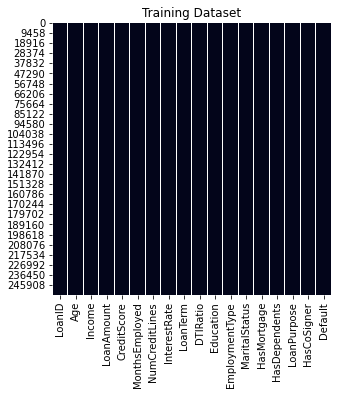

In [10]:
plot_missing_data(train_df, "Training Dataset")

So no data is missing

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          109435 non-null  object 
 1   Age             109435 non-null  int64  
 2   Income          109435 non-null  int64  
 3   LoanAmount      109435 non-null  int64  
 4   CreditScore     109435 non-null  int64  
 5   MonthsEmployed  109435 non-null  int64  
 6   NumCreditLines  109435 non-null  int64  
 7   InterestRate    109435 non-null  float64
 8   LoanTerm        109435 non-null  int64  
 9   DTIRatio        109435 non-null  float64
 10  Education       109435 non-null  object 
 11  EmploymentType  109435 non-null  object 
 12  MaritalStatus   109435 non-null  object 
 13  HasMortgage     109435 non-null  object 
 14  HasDependents   109435 non-null  object 
 15  LoanPurpose     109435 non-null  object 
 16  HasCoSigner     109435 non-null  object 
dtypes: float64

Question 1: How many Defaulted?

In [12]:
train_df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [13]:
train_df['Default'].value_counts(normalize=True)

0    0.883872
1    0.116128
Name: Default, dtype: float64

In [14]:
def bar_chart_stacked(dataset, feature, stacked = True): #Function that plots a bar chart of survived and died based on feature provided
    default = dataset[dataset['Default']==1][feature].value_counts()
    not_default = dataset[dataset['Default']==0][feature].value_counts()
    df_not_default_default = pd.DataFrame([not_default,default])
    df_not_default_default.index = ['Did not Default','Defaulted']
    ax = df_not_default_default.plot(kind='bar',stacked=stacked, figsize=(5,5))

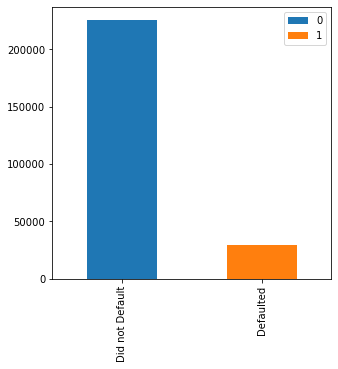

In [15]:
bar_chart_stacked(train_df, "Default")

Question 2: Is the likelihood of default dependent on Age?

In [16]:
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(train_df[feature], color='g', bins=bins, ax=ax)

In [17]:
def plot_kernel_density_estimate_defaulters(dataset, feature1, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title) 
    sns.kdeplot(dataset[feature1].loc[train_df["Default"] == 1],
                shade= True, ax=ax, label='Defaulted').set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[train_df["Default"] == 0],
                shade=True, ax=ax, label="Did Not Default")

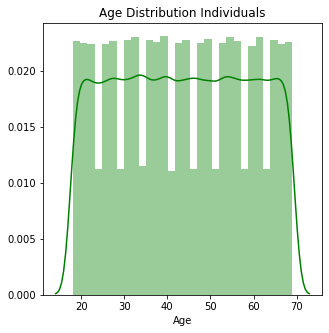

In [18]:
plot_distribution(train_df, "Age", "Age Distribution Individuals")

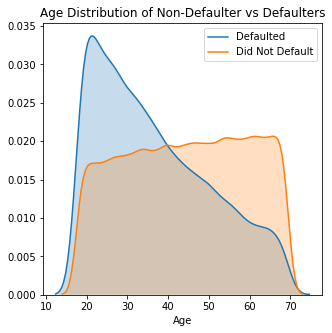

In [19]:
plot_kernel_density_estimate_defaulters(train_df, "Age", "Age Distribution of Non-Defaulter vs Defaulters")

So looks like young folks defaulted more than old

Question 3: Did income play a role default?

In [20]:
train_df.Income.describe()

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64

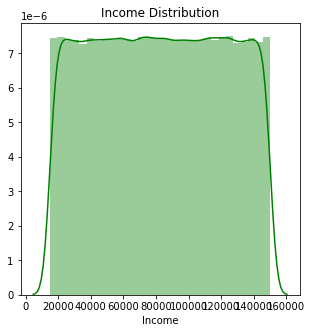

In [21]:
plot_distribution(train_df, "Income", "Income Distribution")

In [22]:
def plot_quartiles(dataset, feature, title, categories):
    fig, axarr = plt.subplots(figsize=(5,5))
    income_ranges = pd.qcut(dataset[feature], len(categories), labels = categories) #. [0, .25, .5, .75, 1.]
    axarr.set_title(title)
    sns.barplot(x=income_ranges, y=dataset.Default, ci=None, ax=axarr).set_ylabel('Default rate')

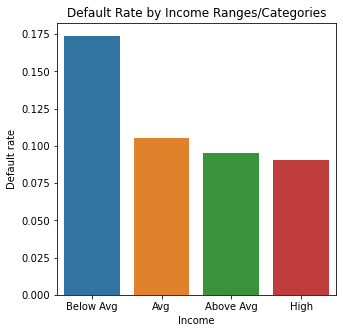

In [23]:
categories = ['Below Avg', 'Avg', 'Above Avg', 'High']

plot_quartiles(train_df, "Income", "Default Rate by Income Ranges/Categories", categories)

So people with Below Avg income defaulted much more often

Does loan amount effect default?

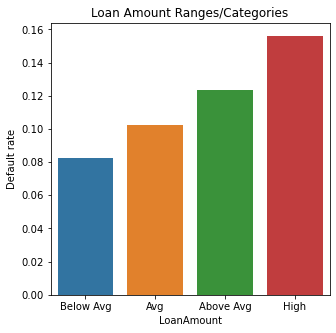

In [24]:
plot_quartiles(train_df, "LoanAmount", "Loan Amount Ranges/Categories", categories)

Default rate increases as Loan amount increases

Does credit score relates to Default

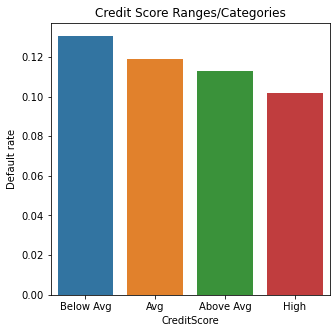

In [25]:
plot_quartiles(train_df, "CreditScore", "Credit Score Ranges/Categories", categories)

Credit score is inversely proportional to Default

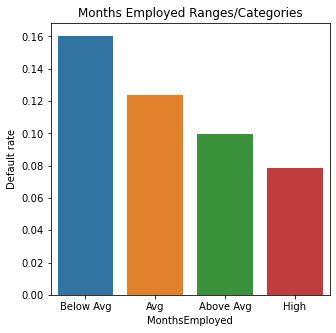

In [26]:
plot_quartiles(train_df, "MonthsEmployed", "Months Employed Ranges/Categories", categories)

Service period is also inversely proportional to Default

In [27]:
def show_countplot(dataset, feature, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    sns.countplot(x=dataset[feature], ax=ax).set_title(title)

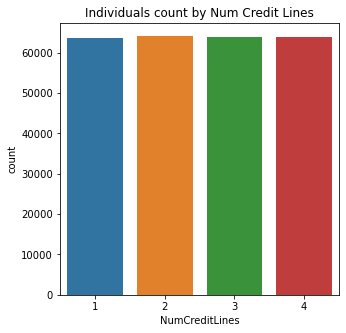

In [28]:
show_countplot(train_df, "NumCreditLines", 'Individuals count by Num Credit Lines')

In [29]:
def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax=ax).set_title(title)   

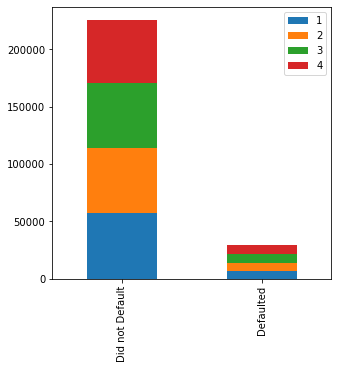

In [30]:
bar_chart_stacked(train_df, 'NumCreditLines') 

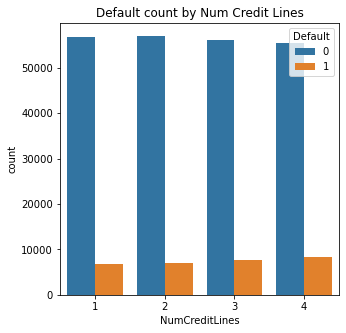

In [31]:
show_compare_countplot(train_df, "NumCreditLines", "Default", "Default count by Num Credit Lines")

In [32]:
pd.pivot_table(train_df, index = 'Default', columns = 'NumCreditLines', values = 'LoanID' ,aggfunc ='count')

NumCreditLines,1,2,3,4
Default,,,,
0,56866,57038,56222,55568
1,6688,7092,7612,8261


Default increases somewhat if Num Credit Lines increase

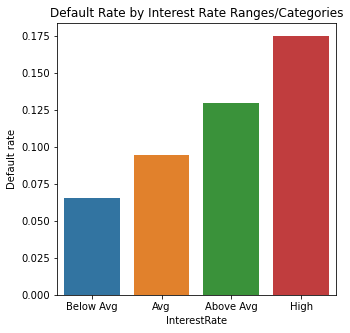

In [33]:
plot_quartiles(train_df, "InterestRate", "Default Rate by Interest Rate Ranges/Categories", categories)

Default rate increases significantly if Loan Rate increases

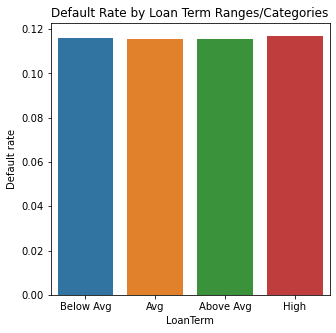

In [34]:
plot_quartiles(train_df, "LoanTerm", "Default Rate by Loan Term Ranges/Categories", categories)

In [35]:
pd.pivot_table(train_df, index = 'Default', columns = 'LoanTerm', values = 'LoanID' ,aggfunc ='count')

LoanTerm,12,24,36,48,60
Default,,,,,
0,45037,45088,45154,45244,45171
1,5920,5921,5907,5922,5983


Loan term has little effect on default rate

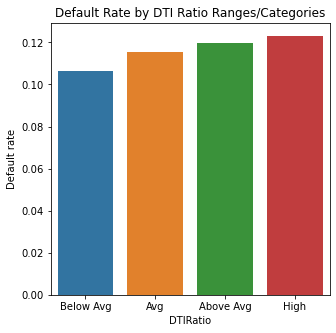

In [36]:
plot_quartiles(train_df, "DTIRatio", "Default Rate by DTI Ratio Ranges/Categories", categories)

Default is proportional to DTI Ratio

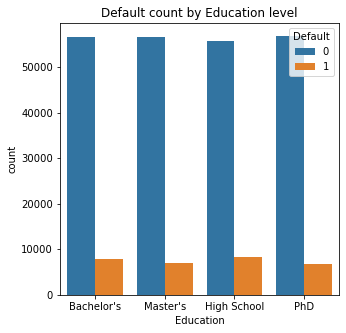

In [37]:
show_compare_countplot(train_df, "Education", "Default", "Default count by Education level")

In [38]:
pd.pivot_table(train_df, index = 'Default', columns = 'Education', values = 'LoanID' ,aggfunc ='count')

Education,Bachelor's,High School,Master's,PhD
Default,,,,
0,56577,55673,56633,56811
1,7789,8230,6908,6726


Default is less if Education is higher

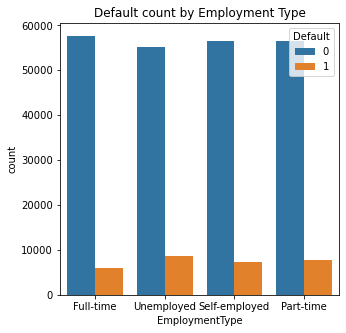

In [39]:
show_compare_countplot(train_df, "EmploymentType", "Default", "Default count by Employment Type")

In [40]:
pd.pivot_table(train_df, index = 'Default', columns = 'EmploymentType', values = 'LoanID' ,aggfunc ='count')

EmploymentType,Full-time,Part-time,Self-employed,Unemployed
Default,,,,
0,57632,56484,56404,55174
1,6024,7677,7302,8650


Default is less if Employment is better

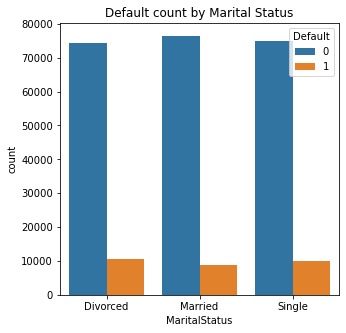

In [41]:
show_compare_countplot(train_df, "MaritalStatus", "Default", "Default count by Marital Status")

In [42]:
pd.pivot_table(train_df, index = 'Default', columns = 'MaritalStatus', values = 'LoanID' ,aggfunc ='count')

MaritalStatus,Divorced,Married,Single
Default,,,
0,74376,76433,74885
1,10657,8869,10127


Default is less if one is Married

In [43]:
pd.pivot_table(train_df, index = 'Default', columns = 'HasMortgage', values = 'LoanID' ,aggfunc ='count')

HasMortgage,No,Yes
Default,,
0,111909,113785
1,15761,13892


Those with Mortgage Defaulted less

In [44]:
pd.pivot_table(train_df, index = 'Default', columns = 'HasDependents', values = 'LoanID' ,aggfunc ='count')

HasDependents,No,Yes
Default,,
0,111368,114326
1,16237,13416


Those with Dependants Defaulted less

In [45]:
def bar_chart_compare(dataset, feature1, feature2=None, title = "Default rate by Loan Reason'"):
    plt.figure(figsize = [5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='Default', hue=feature2, ci=None, data=dataset).set_ylabel('Defaule rate')

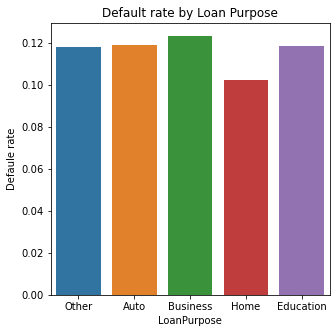

In [46]:
bar_chart_compare(train_df, "LoanPurpose", title = "Default rate by Loan Purpose")

In [47]:
pd.pivot_table(train_df, index = 'Default', columns = 'LoanPurpose', values = 'LoanID' ,aggfunc ='count')

LoanPurpose,Auto,Business,Education,Home,Other
Default,,,,,
0,44803,44975,44967,46037,44912
1,6041,6323,6038,5249,6002


Buiness loans defaulted more then Auto/Education then Home Loans

In [48]:
pd.pivot_table(train_df, index = 'Default', columns = 'HasCoSigner', values = 'LoanID' ,aggfunc ='count')

HasCoSigner,No,Yes
Default,,
0,111223,114471
1,16423,13230


No co signer increases default rate

# Feature Engineering

In [49]:
train_df['Fam'] = (train_df['MaritalStatus'] == 'Married') | (train_df['HasDependents'] == 'Yes') 
train_df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Fam
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,True
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,True
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,True
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1,False
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0,False
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0,True
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1,False
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0,True


In [50]:
train_df = train_df.drop('MaritalStatus', axis=1)
train_df = train_df.drop('HasDependents', axis=1)
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Default,Fam
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Yes,Other,Yes,0,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,No,Other,Yes,0,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Yes,Auto,No,1,True
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,No,Business,No,0,True
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,No,Auto,No,0,True


In [51]:
test_df['Fam'] = (test_df['MaritalStatus'] == 'Married') | (test_df['HasDependents'] == 'Yes') 
test_df = test_df.drop('MaritalStatus', axis=1)
test_df = test_df.drop('HasDependents', axis=1)
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Yes,Other,No,False
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,No,Business,Yes,False
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Yes,Other,Yes,True
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,No,Business,No,False
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Yes,Auto,No,False


In [52]:
train_df = train_df.drop('LoanTerm', axis=1)
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Default,Fam
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,0.44,Bachelor's,Full-time,Yes,Other,Yes,0,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,0.68,Master's,Full-time,No,Other,Yes,0,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,0.31,Master's,Unemployed,Yes,Auto,No,1,True
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,0.23,High School,Full-time,No,Business,No,0,True
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,0.73,Bachelor's,Unemployed,No,Auto,No,0,True


In [53]:
test_df = test_df.drop('LoanTerm', axis=1)
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,0.13,High School,Full-time,Yes,Other,No,False
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,0.59,High School,Self-employed,No,Business,Yes,False
2,STAL716Y79,55,115809,151774,563,3,3,5.51,0.82,Bachelor's,Full-time,Yes,Other,Yes,True
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,0.77,Bachelor's,Unemployed,No,Business,No,False
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,0.44,PhD,Unemployed,Yes,Auto,No,False


In [54]:
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Default,Fam
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,0.44,Bachelor's,Full-time,Yes,Other,Yes,0,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,0.68,Master's,Full-time,No,Other,Yes,0,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,0.31,Master's,Unemployed,Yes,Auto,No,1,True
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,0.23,High School,Full-time,No,Business,No,0,True
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,0.73,Bachelor's,Unemployed,No,Auto,No,0,True


In [55]:
y = train_df['Default']
X = train_df.drop('Default', axis=1)
X = X.drop('LoanID', axis=1)
X = X.drop('NumCreditLines', axis=1)
X = X.drop('DTIRatio', axis=1)
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,56,85994,50587,520,80,15.23,Bachelor's,Full-time,Yes,Other,Yes,True
1,69,50432,124440,458,15,4.81,Master's,Full-time,No,Other,Yes,True
2,46,84208,129188,451,26,21.17,Master's,Unemployed,Yes,Auto,No,True
3,32,31713,44799,743,0,7.07,High School,Full-time,No,Business,No,True
4,60,20437,9139,633,8,6.51,Bachelor's,Unemployed,No,Auto,No,True


In [56]:
# Transform categorical variables to numeric variables
X['Education'] = X['Education'].map({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3 }).astype(int)
X['EmploymentType'] = X['EmploymentType'].map({'Unemployed': 0, 'Part-time': 1, 'Self-employed': 2, 'Full-time': 3}).astype(int)
X['HasMortgage'] = X['HasMortgage'].map({'No': 0, 'Yes': 1}).astype(int)
X['LoanPurpose'] = X['LoanPurpose'].map({'Business': 0, 'Auto': 1, 'Education': 2, 'Other': 3, 'Home': 4 }).astype(int)
X['HasCoSigner'] = X['HasCoSigner'].map({'No': 0, 'Yes': 1}).astype(int)
X["Fam"] = X["Fam"].astype(int)
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,56,85994,50587,520,80,15.23,1,3,1,3,1,1
1,69,50432,124440,458,15,4.81,2,3,0,3,1,1
2,46,84208,129188,451,26,21.17,2,0,1,1,0,1
3,32,31713,44799,743,0,7.07,0,3,0,0,0,1
4,60,20437,9139,633,8,6.51,1,0,0,1,0,1


In [57]:
# We scale our data, it is essential for a smooth working of the models. Scaling means that each columns as a 0 mean and a 1 variance
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,0.261771,-0.444173,1.344137,0.999973,0.706012,0.999785,0.706642
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.308350,0.450914,1.344137,-1.000027,0.706012,0.999785,0.706642
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,1.156831,0.450914,-1.340776,0.999973,-0.706267,-1.000215,0.706642
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,-0.967805,-1.339261,1.344137,-1.000027,-1.412406,-1.000215,0.706642
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,-1.052188,-0.444173,-1.340776,-1.000027,-0.706267,-1.000215,0.706642


In [76]:
test_t=test_df
test_t =test_t.drop('LoanID', axis=1)
test_t = test_t.drop('NumCreditLines', axis=1)
test_t = test_t.drop('DTIRatio', axis=1)
test_t.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,32,131645,43797,802,23,6.10,High School,Full-time,Yes,Other,No,False
1,61,134312,18402,369,87,12.99,High School,Self-employed,No,Business,Yes,False
2,55,115809,151774,563,3,5.51,Bachelor's,Full-time,Yes,Other,Yes,True
3,58,94970,55789,337,24,23.93,Bachelor's,Unemployed,No,Business,No,False
4,63,71727,189798,451,52,22.05,PhD,Unemployed,Yes,Auto,No,False


In [77]:
test_t['Education'] = test_t['Education'].map({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3 }).astype(int)
test_t['EmploymentType'] = test_t['EmploymentType'].map({'Unemployed': 0, 'Part-time': 1, 'Self-employed': 2, 'Full-time': 3}).astype(int)
test_t['HasMortgage'] = test_t['HasMortgage'].map({'No': 0, 'Yes': 1}).astype(int)
test_t['LoanPurpose'] = test_t['LoanPurpose'].map({'Business': 0, 'Auto': 1, 'Education': 2, 'Other': 3, 'Home': 4 }).astype(int)
test_t['HasCoSigner'] = test_t['HasCoSigner'].map({'No': 0, 'Yes': 1}).astype(int)
test_t["Fam"] = test_t["Fam"].astype(int)
test_t.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,32,131645,43797,802,23,6.10,0,3,1,3,0,0
1,61,134312,18402,369,87,12.99,0,2,0,0,1,0
2,55,115809,151774,563,3,5.51,1,3,1,3,1,1
3,58,94970,55789,337,24,23.93,1,0,0,0,0,0
4,63,71727,189798,451,52,22.05,3,0,1,1,0,0


In [78]:
sc = StandardScaler()
test_t = pd.DataFrame(sc.fit_transform(test_t.values), index=test_t.index, columns=test_t.columns)
test_t.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education,EmploymentType,HasMortgage,LoanPurpose,HasCoSigner,Fam
0,-0.768287,1.261556,-1.183681,1.431578,-1.058712,-1.112663,-1.337656,1.336897,1.002479,0.710628,-1.001765,-1.409931
1,1.163005,1.330001,-1.542861,-1.295129,0.793787,-0.076152,-1.337656,0.443119,-0.997527,-1.408630,0.998238,-1.409931
2,0.763427,0.855149,0.343515,-0.073463,-1.637618,-1.201421,-0.440950,1.336897,1.002479,0.710628,0.998238,0.709255
3,0.963216,0.320347,-1.014070,-1.496641,-1.029767,1.569629,-0.440950,-1.344435,-0.997527,-1.408630,-1.001765,-1.409931
4,1.296197,-0.276149,0.881316,-0.778755,-0.219299,1.286807,1.352463,-1.344435,1.002479,-0.702211,-1.001765,-1.409931


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [58]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = RANDOM_STATE)

# Trying classifiers

## Logistic Reg

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

lr = LogisticRegression()
par = {'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,10,15,20], 'max_iter':[100,200]}
gcv = GridSearchCV(lr, param_grid = par, cv = 5, scoring = 'accuracy')
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
pred_lr = gcv.predict(X_val)
score_lr = accuracy_score(y_val, pred_lr)

In [62]:
score_lr

0.8853338554924614

## KN Classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
pred_kn = kn.predict(X_val)
score_kn = accuracy_score(y_val, pred_kn)
score_kn

0.8742706089680831

In [93]:
kn_final = KNeighborsClassifier(n_neighbors=10)
kn_final.fit(X_train, y_train)
pred_kn_final = kn_final.predict(X_val)
score_kn_final = accuracy_score(y_val, pred_kn_final)
score_kn_final

0.8835715684354807

## Decicision Trees 

In [94]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

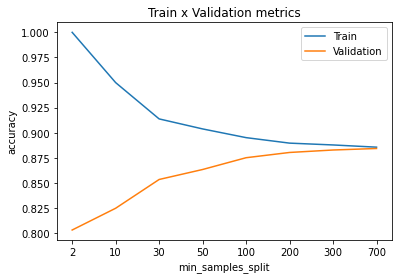

In [95]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

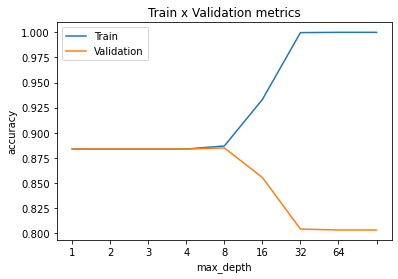

In [96]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [97]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 700,
                                             max_depth = 8,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8853
Metrics validation:
	Accuracy score: 0.8853


## Random Forest

In [98]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

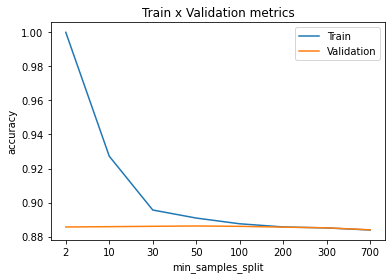

In [99]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

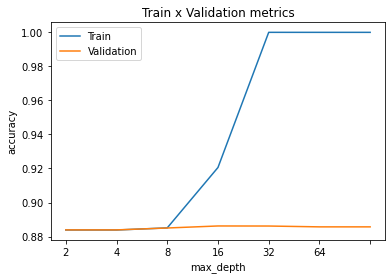

In [100]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

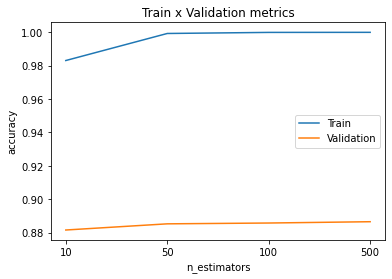

In [101]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [102]:
random_forest_model = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 16, 
                                             min_samples_split = 200).fit(X_train,y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8857
Metrics test:
	Accuracy score: 0.8855


## XGBoost

In [103]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train,y_train, eval_set = [(X_val,y_val)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.63388
[1]	validation_0-logloss:0.58543
[2]	validation_0-logloss:0.54534
[3]	validation_0-logloss:0.51180
[4]	validation_0-logloss:0.48355
[5]	validation_0-logloss:0.45967
[6]	validation_0-logloss:0.43934
[7]	validation_0-logloss:0.42207
[8]	validation_0-logloss:0.40725
[9]	validation_0-logloss:0.39453
[10]	validation_0-logloss:0.38368
[11]	validation_0-logloss:0.37431
[12]	validation_0-logloss:0.36631
[13]	validation_0-logloss:0.35932
[14]	validation_0-logloss:0.35326
[15]	validation_0-logloss:0.34807
[16]	validation_0-logloss:0.34369
[17]	validation_0-logloss:0.33983
[18]	validation_0-logloss:0.33657
[19]	validation_0-logloss:0.33369
[20]	validation_0-logloss:0.33122
[21]	validation_0-logloss:0.32913
[22]	validation_0-logloss:0.32728
[23]	validation_0-logloss:0.32565
[24]	validation_0-logloss:0.32420
[25]	validation_0-logloss:0.32302
[26]	validation_0-logloss:0.32197
[27]	validation_0-logloss:0.32109
[28]	validation_0-logloss:0.32028
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=55, reg_alpha=0, ...)

In [64]:
xgb_model.best_iteration

73

In [65]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8886
Metrics test:
	Accuracy score: 0.8868


## Neural Network

In [66]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization,Concatenate, concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Adam, Nadam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import *

In [67]:
metrics = ['accuracy', 
           Precision(),
           Recall()]

In [68]:
def create_model():
    model = Sequential()
    model.add(Input(shape=X_train.shape[1], name='Input_'))
    model.add(Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.001)))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

    model.summary()
    optimize = Adam(lr = 0.0001)
    model.compile(optimizer = optimize, 
                       loss = 'binary_crossentropy', 
                       metrics = metrics)
    return model

In [69]:
estimator = KerasClassifier(build_fn = create_model, epochs = 70, batch_size = 32, verbose = 1)
kfold = StratifiedKFold(n_splits = 3)
results = cross_val_score(estimator, X, y, cv = kfold)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 537
Trainable params: 537
Non-trainable params: 0
__________________________________________________________

In [72]:
train_history = estimator.fit(X, y, epochs = 35, batch_size = 32)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 537
Trainable params: 537
Non-trainable params: 0
________________________________________________________

In [73]:
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall'])


In [105]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS
predicted_probability = xgb_model.predict(test_t)
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [106]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0
1,JDL5RH07AM,0
2,STAL716Y79,0
3,SO0KKJ3IQB,0
4,T99CWTYDCP,0
5,0SNHFWV4UP,0
6,S6ITP6LGYS,0
7,A6I7U12IRJ,0
8,8W6KY50JU4,0
9,THFQ08OLMU,0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [107]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [108]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [109]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [110]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'
submission.shape

(109435, 2)

In [111]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!